<a href="https://colab.research.google.com/github/Manisha2297/RestroRecommender/blob/main/Lab_4_with_restaurant_titles_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
#mount your own drive to avoid downloading the data multiple time 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df_restaurant = pd.read_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/restaurants_with_title_attribute_category') # Restaurant df with attribute, title, categories

In [4]:
df_review = pd.read_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/reviews_of_NC_state') # reviews of only the NC state

In [5]:
df_review.head(3)

,business_id,date,stars,user_id
0,oyjkEn5fAqcGNsBbqc8LTw,2016-04-11 16:42:13,1.0,XivuRnPq3D-K5cPiBTztIA
1,gfhWUixZ4MmEAC1DtTsodA,2017-06-06 21:04:58,5.0,iAQFEArbXp1WUrseOFTLMA
2,l_kefVF1frmC0xRW2YkvUA,2018-01-21 04:58:46,2.0,oAFF_A02Ws0mwH-lkbzyMQ


In [6]:
df_restaurant.head()

,business_id,Attributes_List,categories_edited,title
0,pQeaRpvuhoEqudo3uymHIQ,"[RestaurantsAttire_u'casual', RestaurantsTakeO...","[Ethnic Food, Food Trucks, Specialty Food, ...",The Empanadas House
1,M_guz7Dj7hX0evS672wIwA,"[BikeParking_True, Caters_True, WheelchairAcce...","[Desserts, Food, Ice Cream & Frozen Yogurt]",Chocolate Shoppe Ice Cream
2,mKTq1T_IAplDpHUcMzOXkw,[BusinessAcceptsCreditCards_True],"[Hotels & Travel, Transportation, Taxis, Be...",Tipsy Ryde
3,eBEfgOPG7pvFhb2wcG9I7w,"[RestaurantsTableService_False, RestaurantsDel...","[Restaurants, Cheesesteaks, Poutineries]",Philthy Phillys
4,lu7vtrp_bE9PnxWfA8g4Pg,"[GoodForKids_True, RestaurantsTakeOut_True, Al...","[Japanese, Fast Food, Food Court, Restaurants]",Banzai Sushi



To use embeddings, we must set up the index to be consecutive.

In [7]:
users = df_review.user_id.unique()
restaurants = df_review.business_id.unique()

In [8]:
restuarant_idx = {o:i for i,o in enumerate(restaurants)} #  all the users 0 indexed
user_idx = {o:i for i,o in enumerate(users)}


In [9]:
df_review['business_id'] = df_review.business_id.apply(lambda x: restuarant_idx[x]) 
df_review['user_id'] = df_review.user_id.apply(lambda x: user_idx[x]) 

In [11]:
df_restaurant = df_restaurant[df_restaurant.business_id.isin(restaurants)]  # getting all the restaurant info for the restuarants in the NV state

In [12]:
df_restaurant['id'] = df_restaurant.business_id.apply(lambda x: restuarant_idx[x]) #making a new column called ID which has the new final restaurant ID 

In [ ]:
df_restaurant.head(3)

,business_id,Attributes_List,categories_edited,title,id
2,mKTq1T_IAplDpHUcMzOXkw,[BusinessAcceptsCreditCards_True],"[Hotels & Travel, Transportation, Taxis, Be...",Tipsy Ryde,354
34,3C0bnFhjkgYP9mWORKg6cA,"[RestaurantsTakeOut_True, RestaurantsDelivery_...","[Hot Dogs, Food, Street Vendors, Restaurants]",Chili Man,106
40,e1tqT4QNOUqDiOvmaIcxfQ,"[BusinessAcceptsCreditCards_True, DogsAllowed_...","[Active Life, Summer Camps, Personal Chefs, ...",Chef Alyssa's Kitchen,123


In [13]:
df_restaurant = df_restaurant.drop('business_id',axis=1).set_index('id')
df_restaurant.head() # Completed the transformation

,Attributes_List,categories_edited,title
id,,,
354,[BusinessAcceptsCreditCards_True],"[Hotels & Travel, Transportation, Taxis, Be...",Tipsy Ryde
106,"[RestaurantsTakeOut_True, RestaurantsDelivery_...","[Hot Dogs, Food, Street Vendors, Restaurants]",Chili Man
123,"[BusinessAcceptsCreditCards_True, DogsAllowed_...","[Active Life, Summer Camps, Personal Chefs, ...",Chef Alyssa's Kitchen
373,"[GoodForKids_True, WheelchairAccessible_True, ...","[Barbeque, Southern, Restaurants, American ...",RayNathan's
296,"[RestaurantsTakeOut_True, GoodForKids_True, Re...","[Restaurants, Hot Dogs, Burgers, Fast Food]",Wendy's


In [ ]:
df_review.head()

,business_id,date,stars,user_id
0,0,2016-04-11 16:42:13,1.0,0
1,1,2017-06-06 21:04:58,5.0,1
2,2,2018-01-21 04:58:46,2.0,2
3,3,2018-05-19 00:32:03,5.0,3
4,4,2015-11-05 23:56:14,2.0,4


In [14]:
restaurant_names = df_restaurant.title.to_dict() #trasnformed key: restaurant_name

In [ ]:
restaurant_names

{354: 'Tipsy Ryde',
 106: 'Chili Man',
 123: "Chef Alyssa's Kitchen",
 373: "RayNathan's",
 296: "Wendy's",
 273: 'Hibachi Express',
 270: 'Exxon Mobile On the Run Cafe',
 260: 'Gandhi International Market',
 14: 'Soul Gastrolounge',
 62: '88 China Bistro',
 48: 'Cafe South',
 17: "Milano's Pizza & Pasta",
 72: "Hef's Bar & Grill",
 9: '18 Asian and Sushi Bar',
 153: 'Chipotle Mexican Grill',
 5: 'The Melting Pot',
 328: "Switchin' Kitchens",
 192: 'Golden Coast II',
 337: 'Cafe At 6100',
 54: "Let's Meat Kbbq",
 18: 'Smashburger',
 111: 'Global Restaurant',
 347: 'Sweet Tooth Festival',
 290: 'Irie Vibes Caribbean Restaurant & Catering',
 338: 'Food Lion',
 232: "Mama's Pizza & Pasta",
 80: 'Wing Eaters',
 134: 'Seaboard Brewing, Tap Room & Wine Bar',
 166: 'Firehouse Subs',
 185: 'Lake Norman Cottage',
 255: 'Yafa Halal Market',
 63: 'Ilios Noche',
 65: 'Malaya Kitchen',
 3: "Jersey Mike's Subs",
 199: 'Starbucks',
 250: 'Taco Bell',
 244: 'Maki Taco',
 176: 'New China',
 147: "Be's 

In [24]:
nusers = df_review.user_id.nunique()
nrestaurants = df_review.business_id.nunique()
nusers, nrestaurants

(100965, 4386)

In [ ]:
# df_review.to_csv("/content/gdrive/MyDrive/YelpDataset/CsvFiles/review_filtered_transformed_with_title.csv", index=False)
# df_restaurant.to_csv("/content/gdrive/MyDrive/YelpDataset/CsvFiles/restaurant_features_transformed_with_title.csv", index=False)

# Setting up the Model

**Train-test split**

In [17]:
np.random.seed=2017
from sklearn.model_selection import train_test_split
train_indices, val_indices = train_test_split(range(df_review.shape[0]), train_size=0.8)
trdf = df_review.iloc[train_indices]
valdf = df_review.iloc[val_indices]
trdf.shape, valdf.shape

((253507, 4), (63377, 4))

In [18]:
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

2.4.1


In [19]:
from tensorflow.keras.layers import Input, Embedding, Add, Dot, Flatten
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

We first set our hypeparameters, the size of the latent factors or the embeddings, up, and the amount of regularization. You will usually want to fit these hyper-parameters on the validation set.

In [20]:
L = 100
REG=5e-4

We first write a function to return us a bias layer:

In [21]:

def create_bias(name, inp, n_in, reg):
    #x = Embedding(n_in, 1, input_length=1, embeddings_regularizer=l2(reg))(inp)
    x = Embedding(n_in, 1, input_length=1, name=name)(inp)
    return Flatten(name=name+'_flat')(x)

Embedding layer...

In [22]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1, name=name.split('_')[0]+'_factor', embeddings_regularizer=l2(reg))(inp)

Now we define our embeddings and biases...

In [25]:
user_input, uLmat = embedding_input('user_input', nusers, L, REG)
restuarant_input, mLmat = embedding_input('restaurant_input', nrestaurants, L, REG)

In [26]:
user_bias = create_bias('user_bias', user_input, nusers, REG)
restaurant_bias = create_bias('restaurant_bias', restuarant_input, nrestaurants, REG)


The embeddings are matrix multiplied together (dot producted together) to get the residual matrix, which is then flattened.

In [28]:
residual = Dot(axes=2, name="residual")([uLmat, mLmat])

In [29]:
residflat = Flatten(name="residual_flat")(residual)

We add the flattened residual and the biases into the linear regression..

In [30]:
regression = Add(name="regression")([user_bias, restaurant_bias, residflat]) 

In [31]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K

In [32]:
def sigmoid_maker(low, high):
    def custom_sigmoid(x):
        return K.sigmoid(x)*(high - low) + low #within range
    return custom_sigmoid

In [33]:
cs = sigmoid_maker(0, 5.5)

In [34]:
output = Activation(cs, name="Sigmoid_Range")(regression)

Now we set up the model with the user_ids and restaurant_ids as input, and the output of the sigmoid as output..and ask Keras for a summary..compiling it with Adam and a learning rate of 0.001.

In [35]:
model = Model([user_input, restuarant_input], output)
model.compile(Adam(0.001), loss='mse')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
restaurant_input (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_factor (Embedding)         (None, 1, 100)       10096500    user_input[0][0]                 
__________________________________________________________________________________________________
restaurant_factor (Embedding)   (None, 1, 100)       438600      restaurant_input[0][0]           
______________________________________________________________________________________________

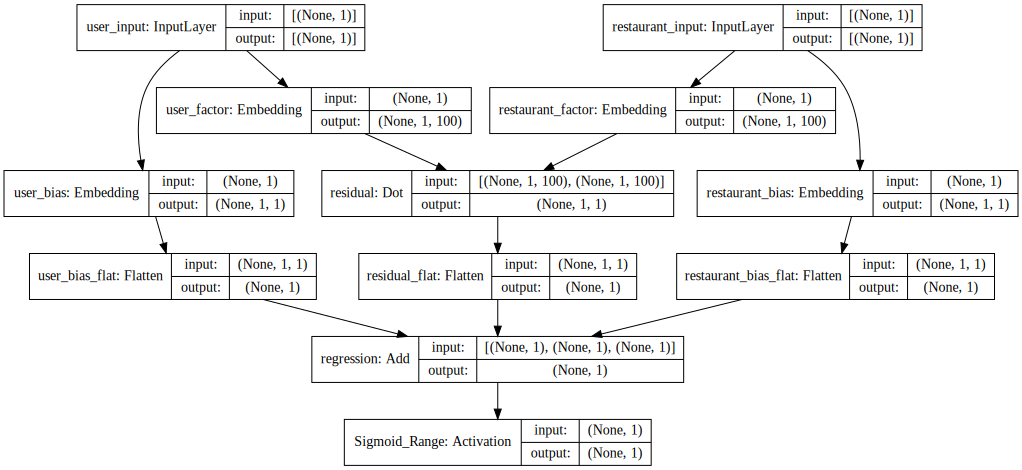

In [ ]:
import pydot
from tensorflow.keras.utils import model_to_dot

from IPython.display import SVG
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, dpi=72, rankdir='TB').create_svg())


# Training the model

In [36]:
model.optimizer.lr = 0.001 

In [ ]:
X = trdf.drop(['stars','date'], axis=1)
y = trdf['stars']
X_val = valdf.drop(['stars','date'], axis=1)
y_val = valdf['stars']
history_1 = model.fit([trdf['user_id'], trdf['business_id']],y, validation_data=([valdf['user_id'], valdf['business_id']], y_val), epochs=10)

Epoch 1/10
7923/7923 [==============================] - 525s 66ms/step - loss: 2.4985 - val_loss: 1.7451
Epoch 2/10
7923/7923 [==============================] - 523s 66ms/step - loss: 1.6168 - val_loss: 1.5798
Epoch 3/10
7923/7923 [==============================] - 523s 66ms/step - loss: 1.4338 - val_loss: 1.5320
Epoch 4/10
7923/7923 [==============================] - 523s 66ms/step - loss: 1.3493 - val_loss: 1.5124
Epoch 5/10
7923/7923 [==============================] - 524s 66ms/step - loss: 1.2885 - val_loss: 1.5042
Epoch 6/10
7923/7923 [==============================] - 523s 66ms/step - loss: 1.2325 - val_loss: 1.5013
Epoch 7/10
7923/7923 [==============================] - 525s 66ms/step - loss: 1.1941 - val_loss: 1.5013
Epoch 8/10
7923/7923 [==============================] - 522s 66ms/step - loss: 1.1610 - val_loss: 1.5025
Epoch 9/10
7923/7923 [==============================] - 523s 66ms/step - loss: 1.1223 - val_loss: 1.5062
Epoch 10/10
7923/7923 [==============================] 

In [ ]:
def plot_loss(history):  
  #your code here 
  plt.rcParams["figure.figsize"] = (10,8)
  plt.title("Batch normalized model")
  plt.semilogy(history.history['loss'], label='Train Loss', color='#FF9A98', linewidth=1)
  plt.semilogy(history.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
  plt.legend()

  # Set the axes labels
  plt.xlabel('Epochs')
  plt.ylabel('MSE Loss')
  plt.tight_layout()
  plt.legend()
  plt.show()

## Plot the trajectory of the validation loss

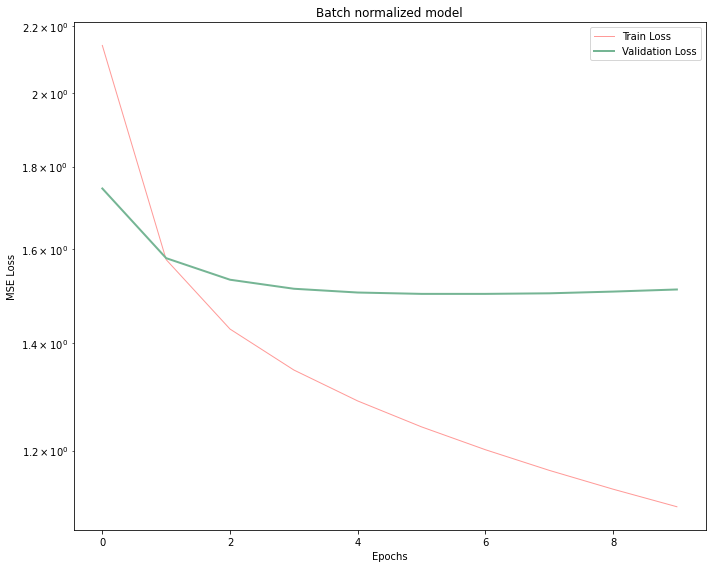

In [ ]:
plot_loss(history_1)

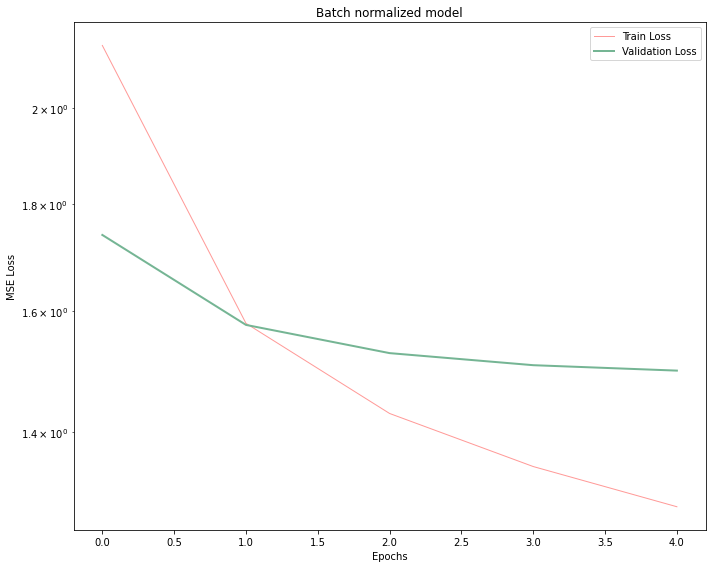

In [ ]:
plot_loss(history_3)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, verbose=1)


model.optimizer.lr=0.001
history_4 = model.fit([trdf['user_id'], trdf['business_id']],y, validation_data=([valdf['user_id'], valdf['business_id']], y_val), epochs=10, callbacks=[callback] )

Epoch 1/10
7923/7923 [==============================] - 538s 68ms/step - loss: 1.2431 - val_loss: 1.4948
Epoch 2/10
7923/7923 [==============================] - 540s 68ms/step - loss: 1.2033 - val_loss: 1.4940
Epoch 3/10
7923/7923 [==============================] - 541s 68ms/step - loss: 1.1684 - val_loss: 1.4951
Epoch 4/10
7923/7923 [==============================] - 540s 68ms/step - loss: 1.1374 - val_loss: 1.4979
Epoch 5/10
7923/7923 [==============================] - 539s 68ms/step - loss: 1.1093 - val_loss: 1.5012
Epoch 6/10
7923/7923 [==============================] - 544s 69ms/step - loss: 1.0839 - val_loss: 1.5054
Epoch 7/10
7923/7923 [==============================] - 546s 69ms/step - loss: 1.0603 - val_loss: 1.5097
Epoch 8/10
7923/7923 [==============================] - 548s 69ms/step - loss: 1.0387 - val_loss: 1.5150
Epoch 9/10
7923/7923 [==============================] - 546s 69ms/step - loss: 1.0188 - val_loss: 1.5198
Epoch 10/10
7923/7923 [==============================] 

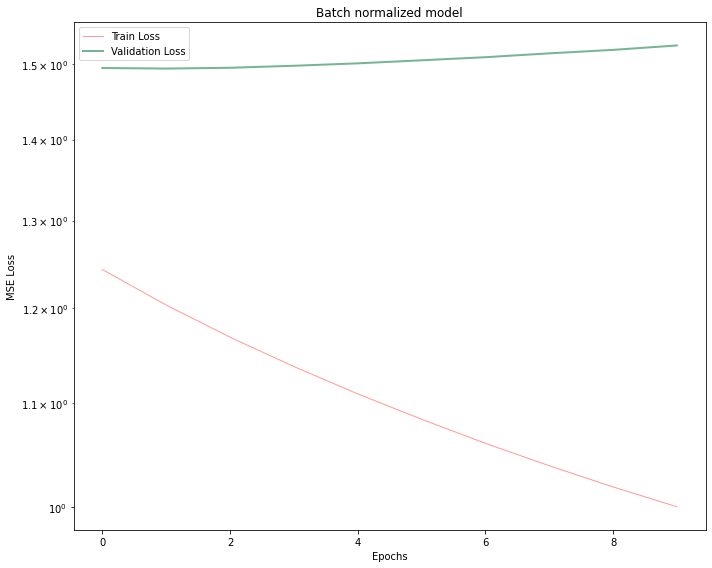

In [ ]:
plot_loss(history_4)

In [ ]:
history_5 = model.fit([trdf['user_id'], trdf['business_id']],y, validation_data=([valdf['user_id'], valdf['business_id']], y_val), epochs=5)

In [ ]:
plot_loss(history_5)

NameError: ignored

In [ ]:

#Saving the model

model.save_weights("/content/gdrive/MyDrive/cf.h5")

NameError: ignored

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

In [ ]:

#Saving the model

model.save_weights("/content/gdrive/MyDrive/YelpDataset/models")